# Natural Language Processing (NLP) with spaCy  

Get to know the library  
<font size="1"> This document is intended as teaching material for a course with a coach. (There are not enough comments for self-study).</font> 

## Basic terms

- **Language** in general is a communication system.
- ***Natural* Language** means the way humans interact in speech or with signs as distinguished from computer programming language.  
- ***Written* Language** is a representation of natural language. It cannot be understood by computers which can only process numbers, but it can easily be transformed so that it can be **processed** by computers.<br><br> 
&rightarrow; **NLP** means to process written natural language.

## NLP categorization  

Natural Language Processing is a fairly complex field due to several reasons  
- It has an interdisciplinary nature (computer science, linguistics, cognitive science).
- There are many overlapping tasks (like text summarization or question answering).  
- There a rapid evolution from basisc like statistical analysis to multimodal NLP with transfomers. You can distinguish those levels of processing texts:
  - Feature engineering text, e.g. tokenizing, lemmatizing, ...
  - *Bag of words* in which the words' semantics and their order are disregarded. *Bag of words* is still state of the art and very useful e.g. for topic modelling with LDA or NMF.
  - Word embeddings which somehow "understands" the words' meaning using algebraic vectors
  - NLP with advanced deep learning, e.g. Transfer Learning or Transformers for question answering  


Therefore several NLP categories have been defined, like  
- core NLP tasks like tokenization, part-of-speech tagging, ...
- applying tasks like sentiment analysis or translations
- Generative vs. predictive tasks, for example text summarization vs. categorization
- ...  

spaCy is a powerful toolkit that bridges the two fields of traditional NLP techniques and modern transformer-based approaches.

## Concepts covered in this course

- **Tokenization**  
 segments text into words, punctuation, etc. This is language specific.  
- **Part of Speech (PoS** or word class)  
 [language](https://en.wikipedia.org/wiki/List_of_ISO_639-1_codes) dependent. Examples: nouns (e.g. _Berlin_, _school_), verbs (_eat_, _laugh_), interjections (_oops_, _yes_)
- **Sentence Boundary Detection (SBD)**  
 Find a sentence, a sequence of words that expresses a thought.
- **Constituent**  
 defines the function and dependency of a word in a sentence, e.g. _"Sam_ (subject) _drinks_ (predicate) _tea_ (object)_."_
- **Named Entity Recognition (NER)**  
 recognize real-world objects, such as a person, location, organization, e.g. _Einstein, Tower Bridge, Middle Ages_
- **Stop word**  
 insignificant word, usually specifically stored in a dictionary, e.g. _and, the, of_
- **Lemmatization**  
 reducing an inflected form of a word so that the reduced form still belongs to the language, e.g. _am , are_ &rightarrow; _be_
- Stemming (not available in SpaCy, use nltk instead)  
 also reduces word forms but by removing the suffix. The result is often no word, e.g. _changing, change_ &rightarrow; _chang_  
- **Word embedding**  
 awesome description of words so that you can find word or text similarities and perform arithmetic operations!
- **Rule-based matching**  
 find words in a text that match certain of the above characteristics  
 
---
All the above mentioned terms are supported by spaCy (except for stemming). We will discover them now one by one.<br><br>

## Get to know [spaCy](https://explosion.ai/)
by creating a crossword with the words from Grimm's fairy tales

### Installation / getting a corpus

[Install](https://spacy.io) spacy and the language models you need:  
- en_core_web_sm  (small but fast)  
- en_core_web_md  (medium)
- en_core_web_lg  (large/slow but accurate)

Install the pdf library
```
# take one of these
# !conda install PyMuPDF
# !conda install -c conda-forge PyMuPDF
# !pip install PyMuPDF
```

For the corpus we could use this [document](https://www.planetebook.com/free-ebooks/grimms-fairy-tales.pdf) or any from [gutenberg.org](https://gutenberg.org).

In [1]:
import fitz  # This is part of PyMuPDF

pdf = fitz.open('./data/grimms-fairy-tales.pdf')
pdf_pages = [page.get_text().replace("\n", " ") for page in pdf]

In [2]:
len(pdf_pages)

373

In [3]:
pdf_pages[1]

'Grimms’ Fairy Tales \uf645 THE GOLDEN BIRD A  certain king had a beautiful garden, and in the garden  stood a tree which bore golden apples. These apples  were always counted, and about the time when they began  to grow ripe it was found that every night one of them was  gone. The king became very angry at this, and ordered the  gardener to keep watch all night under the tree. The gar- dener set his eldest son to watch; but about twelve o’clock  he fell asleep, and in the morning another of the apples was  missing. Then the second son was ordered to watch; and  at midnight he too fell asleep, and in the morning another  apple was gone. Then the third son offered to keep watch;  but the gardener at first would not let him, for fear some  harm should come to him: however, at last he consented,  and the young man laid himself under the tree to watch. As  the clock struck twelve he heard a rustling noise in the air,  and a bird came flying that was of pure gold; and as it was  snapping at

In [4]:
import spacy
nlp = spacy.load('en_core_web_lg')  # save ressources with: ..., disable=['parser', 'tagger', 'textcat', 'ner'])

### Sentence boundary detection

Sentence detection is not that easy because sometimes dots, exclamation marks, etc. occur witin a sentence.  

In [5]:
doc = nlp(pdf_pages[1]) 
sents = list(doc.sents)

In [6]:
sents

[Grimms’ Fairy Tales ,
 THE GOLDEN BIRD,
 A  certain king had a beautiful garden, and in the garden  stood a tree which bore golden apples.,
 These apples  were always counted, and about the time when they began  to grow ripe it was found that every night one of them was  gone.,
 The king became very angry at this, and ordered the  gardener to keep watch all night under the tree.,
 The gar- dener set his eldest son to watch; but about twelve o’clock  he fell asleep, and in the morning another of the apples was  missing.,
 Then the second son was ordered to watch; and  at midnight he too fell asleep, and in the morning another  apple was gone.,
 Then the third son offered to keep watch;  but the gardener at first would not let him, for fear some  harm should come to him: however, at last he consented,  and the young man laid himself under the tree to watch.,
 As  the clock struck twelve he heard a rustling noise in the air,  and a bird came flying that was of pure gold; and as it was  

Let's take a short sentence of the first page.

In [7]:
exampletext = sents[1]
exampletext.text

'THE GOLDEN BIRD'

### Finding tokens and their part of speech (PoS)

Finding tokens is subject to many exceptions:

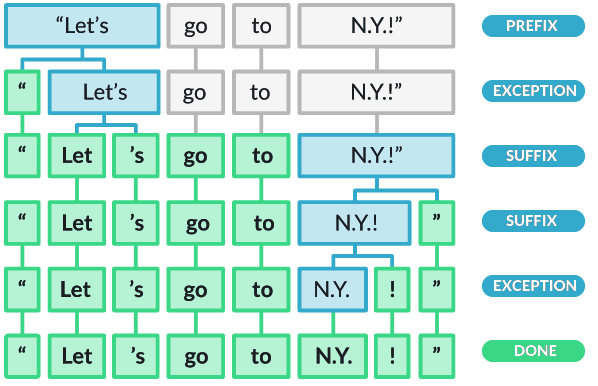  
[Figure source](https://spacy.io/usage/linguistic-features)

In [8]:
doc = nlp(exampletext.text)
for token in doc:
    print(token.text, token.pos_)

THE DET
GOLDEN PROPN
BIRD NOUN


You can find the meaning of the abbreviations [here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) or [here](https://universaldependencies.org/docs/u/pos/).

### Constituents / dependency parsing / displacy

In [9]:
import pandas as pd
table = pd.DataFrame(columns = ['pos', 'dep', 'Explain dep', 'shape', 'is_stop', 'is out of vocabulary'])

for token in doc:
    table.loc[len(table)] = [token.pos_, token.dep_, spacy.explain(token.dep_),  # length of table increases by iteration
                             token.shape_, token.is_stop, token.is_oov]
table.index = doc
table

,pos,dep,Explain dep,shape,is_stop,is out of vocabulary
THE,DET,det,determiner,XXX,True,False
GOLDEN,PROPN,compound,compound,XXXX,False,False
BIRD,NOUN,ROOT,root,XXXX,False,False


BTW: This is the list of the loaded language model's stop words

spacy.lang.en.stop_words.STOP_WORDS

We can also visualize the dependency.

In [10]:
from spacy import displacy

In [11]:
displacy.render(doc, style="dep")

### Lemmatization

In [12]:
exampletext = sents[2]  # the next sentence

doc = nlp(exampletext.text)
for token in doc:
  print(token.text, token.lemma_)  # this time without pandas

A a
   
certain certain
king king
had have
a a
beautiful beautiful
garden garden
, ,
and and
in in
the the
garden garden
   
stood stand
a a
tree tree
which which
bore bear
golden golden
apples apple
. .


### Named entity recognition (NER)

In [13]:
doc = nlp(pdf_pages[371])

In [14]:
displacy.render(doc, style="ent")

If you want to get rid of the word separations, you can use **textacy** first:

In [15]:
import textacy.preprocessing
text_normalized = textacy.preprocessing.normalize.hyphenated_words(pdf_pages[371])  # reconnects separated words
text_normalized = textacy.preprocessing.normalize.whitespace(text_normalized)  # removes excess blanks
doc = nlp(text_normalized)

What do these abbreviations mean?

In [16]:
for ent in doc.ents:
  print(ent.text, "|", ent.label_, "|", spacy.explain(ent.label_))

Grimms | PERSON | People, including fictional
372 | CARDINAL | Numerals that do not fall under another type
many years | DATE | Absolute or relative dates or periods
two | CARDINAL | Numerals that do not fall under another type
every year | DATE | Absolute or relative dates or periods
Jacob | PERSON | People, including fictional
1785-1863 | DATE | Absolute or relative dates or periods
Wilhelm | PERSON | People, including fictional
1786-1859 | DATE | Absolute or relative dates or periods
Hanau | GPE | Countries, cities, states
Frankfurt | GPE | Countries, cities, states
German | NORP | Nationalities or religious or political groups
Hesse | GPE | Countries, cities, states
Marburg University | ORG | Companies, agencies, institutions, etc.
Jacob | PERSON | People, including fictional
German | NORP | Nationalities or religious or political groups
Wilhelm | PERSON | People, including fictional
German | NORP | Nationalities or religious or political groups
a century | DATE | Absolute or relat

### Matching

Matching can be thought of as a general form of regex. Outputs the result and the position in text:
- phrase matching: `from spacy.matcher import PhraseMatcher` searches for specific phrases
- entity ruler: `from spacy.pipeline import EntityRuler`, search for named entities (NER)
- token matching: `from spacy.matcher import Matcher` see below  

Let's try to extraxt all nouns of Grimm's fairy tales.  
- merge all pages  
- remove all words not in vocabulary
- find all nouns

In [17]:
all_pages = ""
for i, _ in enumerate(pdf_pages):
    all_pages = all_pages + " " + pdf_pages[i]

In [18]:
doc = nlp(all_pages)

In [19]:
text = [token.text for token in doc if not token.is_oov]

In [20]:
doc = nlp(" ".join(text))

#### Using the Matcher

In [21]:
from spacy.matcher import Matcher

In [22]:
matcher = Matcher(nlp.vocab)

In [23]:
# pattern = [{"POS":"NOUN"}]  # you can also use more than one token, e.g. [{"POS":"ADJ"}, {"POS":"NOUN"}]
pattern = [{"POS":"ADJ"}, {"POS":"NOUN"}]

In [24]:
matcher.add("Matching", [pattern])

In [25]:
matches = matcher(doc)

In [26]:
wordlist = []
for match_id, start, end in matches:
    if doc[start:end].text.lower() not in wordlist:
        wordlist.append(doc[start:end].text.lower())
  

In [27]:
# wordlist.sort()

In [28]:
wordlist

['classic literature',
 'golden bird',
 'certain king',
 'beautiful garden',
 'golden apples',
 'eldest son',
 'second son',
 'third son',
 'young man',
 'pure gold',
 'golden feather',
 'whole bird',
 'tle way',
 'good counsel',
 'shabby house',
 'charming place',
 'same thing',
 'good advice',
 'eldest brother',
 'same manner',
 'youngest son',
 'wide world',
 'long while',
 'ill luck',
 'shabby inn',
 'whole troop',
 'wooden cage',
 'golden cage',
 'handsome one',
 'droll thing',
 'fine bird',
 'shabby cage',
 'loud scream',
 'next morning',
 'golden horse',
 'great despair',
 'old saddle',
 'golden one',
 'golden saddle',
 'great pity',
 'good one',
 'beautiful princess',
 'many tears',
 'whole world',
 'great thing',
 'beautiful cess',
 'right horse',
 'great wood',
 'good sel',
 'hard matter',
 'great noise',
 'great rejoicing',
 'poor man',
 'many years',
 'good luck',
 'much gain',
 'poor puss',
 'lucky beings',
 'long years',
 'poor mother',
 'good servant',
 'fine thing',
 'g

#### Creating nouns for our crossword

In [29]:
nouns = []
for token in doc:
    if token.pos_ == "NOUN" and token.lemma_ not in nouns:  # and ... to avoid duplicates *)
        nouns.append(token.lemma_.lower())
        
        
nouns.sort()


# *) suggestion: keep duplicates and use only those words that are used more than once to be more fairy tail specific.

In [30]:
nouns

['abode',
 'absence',
 'abundance',
 'accident',
 'accord',
 'account',
 'ace',
 'acquaintance',
 'ado',
 'advantage',
 'adventure',
 'advice',
 'affair',
 'afternoon',
 'age',
 'aid',
 'aim',
 'air',
 'alarm',
 'ale',
 'alm',
 'altar',
 'ambassador',
 'ambush',
 'amend',
 'amusement',
 'angel',
 'anger',
 'animal',
 'answer',
 'ant',
 'ante',
 'anvil',
 'anxiety',
 'appetite',
 'apple',
 'approach',
 'apron',
 'ard',
 'arm',
 'armour',
 'army',
 'arrangement',
 'arrogance',
 'arrow',
 'art',
 'ary',
 'ash',
 'ashe',
 'ass',
 'assistance',
 'astonishment',
 'attempt',
 'attendance',
 'attendant',
 'attention',
 'aught',
 'avail',
 'avarice',
 'axe',
 'b',
 'baby',
 'back',
 'bacon',
 'bag',
 'bake',
 'baker',
 'ball',
 'band',
 'bank',
 'bar',
 'bare',
 'bargain',
 'bark',
 'barn',
 'baron',
 'barrel',
 'basket',
 'bath',
 'bathing',
 'battle',
 'battlefield',
 'beak',
 'beam',
 'bean',
 'bear',
 'beard',
 'bearer',
 'bearskin',
 'beast',
 'beating',
 'beauty',
 'bed',
 'bedchamber',
 

In [31]:
with open('./xword/words_for_crossword.txt', 'w') as f:
    f.write('\n'.join(nouns))

This wordlist can now be converted into a crossword, e.g. by using [this](https://github.com/AhmadIssaAlaa/crossword_puzzle_generator/blob/main/words_for_testings.txt) crossword puzzle generator.    

## Word embeddings

Spacy can also be used to find `similarity`.

In [32]:
texts1 = ["regular expressions", "beautiful soup", "URL", "HTML"]
texts2 = ["address of a website", "language to find patterns", "python library", "web page format"]

for item1 in texts1:
    doc1 = nlp(item1)
    for item2 in texts2:
        doc2 = nlp(item2)
        
        print(doc1, "<-->", doc2, doc1.similarity(doc2))
    
    print()

regular expressions <--> address of a website 0.44429680705070496
regular expressions <--> language to find patterns 0.5893536806106567
regular expressions <--> python library 0.34715139865875244
regular expressions <--> web page format 0.37790149450302124

beautiful soup <--> address of a website 0.3643006980419159
beautiful soup <--> language to find patterns 0.4374332129955292
beautiful soup <--> python library 0.22017304599285126
beautiful soup <--> web page format 0.21162518858909607

URL <--> address of a website 0.36934971809387207
URL <--> language to find patterns 0.29930201172828674
URL <--> python library 0.25063157081604004
URL <--> web page format 0.43186071515083313

HTML <--> address of a website 0.30191126465797424
HTML <--> language to find patterns 0.28487610816955566
HTML <--> python library 0.3991927206516266
HTML <--> web page format 0.6005067825317383



In bag of words the words' meaning was not considered in any way. Each _song_ (e.g.) was represented by a vector according to the frequency of the words.<br><br>
When using _word_ embeddings, each _word_ is represented by a vector. You could train these embeddings yourself (&rarr; CBOW, Skip-gram), or you can use existing word embeddings like those from word2vec (used by spaCy), fastText, or gloVe. The dimension of the vectors is usually several hundred.

### Word similarity and word vectors


In [33]:
man = nlp('man')[0]
woman = nlp('woman')[0]

In [34]:
woman.vector, len(woman.vector)

(array([ 2.5567e-02,  2.7885e-01, -1.6992e-01,  2.7348e-01, -5.4906e-02,
         2.6873e-01,  1.5479e-01, -2.2401e-01,  2.6404e-01,  3.2573e+00,
        -3.6653e-01,  1.4961e-01, -2.6870e-01, -3.1193e-01, -5.0554e-01,
        -1.8622e-02, -5.3002e-01,  6.2383e-01,  2.0168e-01,  2.1561e-01,
        -1.9996e-01, -3.3419e-01, -9.5230e-02, -2.5538e-01,  2.1543e-01,
         1.0939e-01,  4.1532e-01,  1.5005e-01,  3.9662e-01, -2.5728e-01,
        -4.6104e-01,  2.9125e-01, -1.0363e-01, -1.6447e-01,  9.3747e-01,
        -4.5412e-02,  2.7272e-01, -7.1627e-01, -3.8877e-01,  1.6912e-01,
         4.3804e-01, -2.2131e-01,  2.0337e-01, -3.6581e-01, -3.6242e-02,
        -2.1563e-01, -1.1942e-01, -2.9580e-01,  3.4733e-01, -1.6351e-02,
        -7.9160e-01, -2.4388e-01, -4.8220e-01, -4.5474e-01,  2.1058e-01,
         6.3894e-01,  8.8826e-02, -2.2047e-01, -5.9894e-02, -4.2726e-01,
        -9.9469e-02, -5.2176e-01,  4.6980e-02,  3.2228e-01, -1.0954e-01,
        -2.5837e-01,  1.0217e-01,  9.0491e-02,  1.8

Text(0, 0.5, 'characteristics of woman')

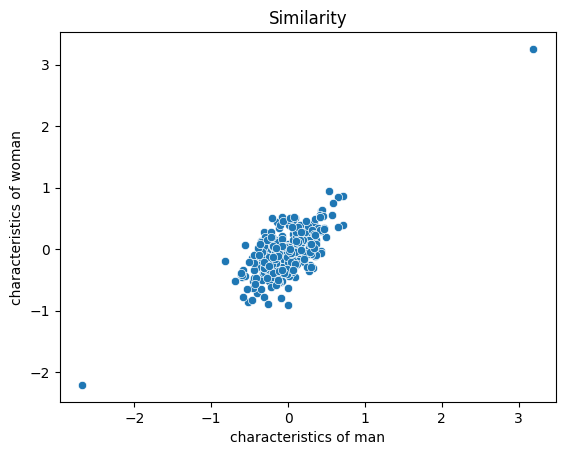

In [35]:
import seaborn as sns
plot = sns.scatterplot(x=man.vector, y=woman.vector)

plot.set_title('Similarity')
plot.set_xlabel('characteristics of man')
plot.set_ylabel('characteristics of woman')

In [36]:
king = nlp('king')[0]
(king.vector - man.vector + woman.vector).text

AttributeError: 'numpy.ndarray' object has no attribute 'text'

This does not work. There is no inverse function to `.vector`: It would be very unlikely to exactly match a word vector (300 floating point numbers!).

[Instead](https://ashutoshtripathi.com/2020/09/04/word2vec-and-semantic-similarity-using-spacy-nlp-spacy-series-part-7/) find closest word vector:

In [37]:
new_vector = king.vector - man.vector + woman.vector

In [38]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

computed_similarities = []

for word in nlp.vocab:
# Ignore words without vectors and mixed-case words:
    if word.has_vector:
        if word.is_lower:
            if word.is_alpha:
                similarity = cosine_similarity(new_vector, word.vector)
                computed_similarities.append((word, similarity))
                
computed_similarities = sorted(computed_similarities, key=lambda item: -item[1])
computed_similarities[1][0].text

'queen'

## References


[spaCy overview](https://spacy.io/usage/spacy-101 )  
[spaCy course](https://course.spacy.io/en/)  
[spaCy models](https://spacy.io/models)  
[NLTK](http://nltk.org/), another powerful library for NLP